# DRAGON ESTATES - PREDICTION

### steps we will do here
1. first, we will split data into  train test split 
2. creating pipline for imputing,standardSacler
3.  model selection: quick check of small sample prediction vs actual.later perform on large data of x_train
4.  prediction:after slection model which having less error ,predicting using x_test
5. model usuage : by taking input 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
housing = pd.read_csv("Boston.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'BLACK'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

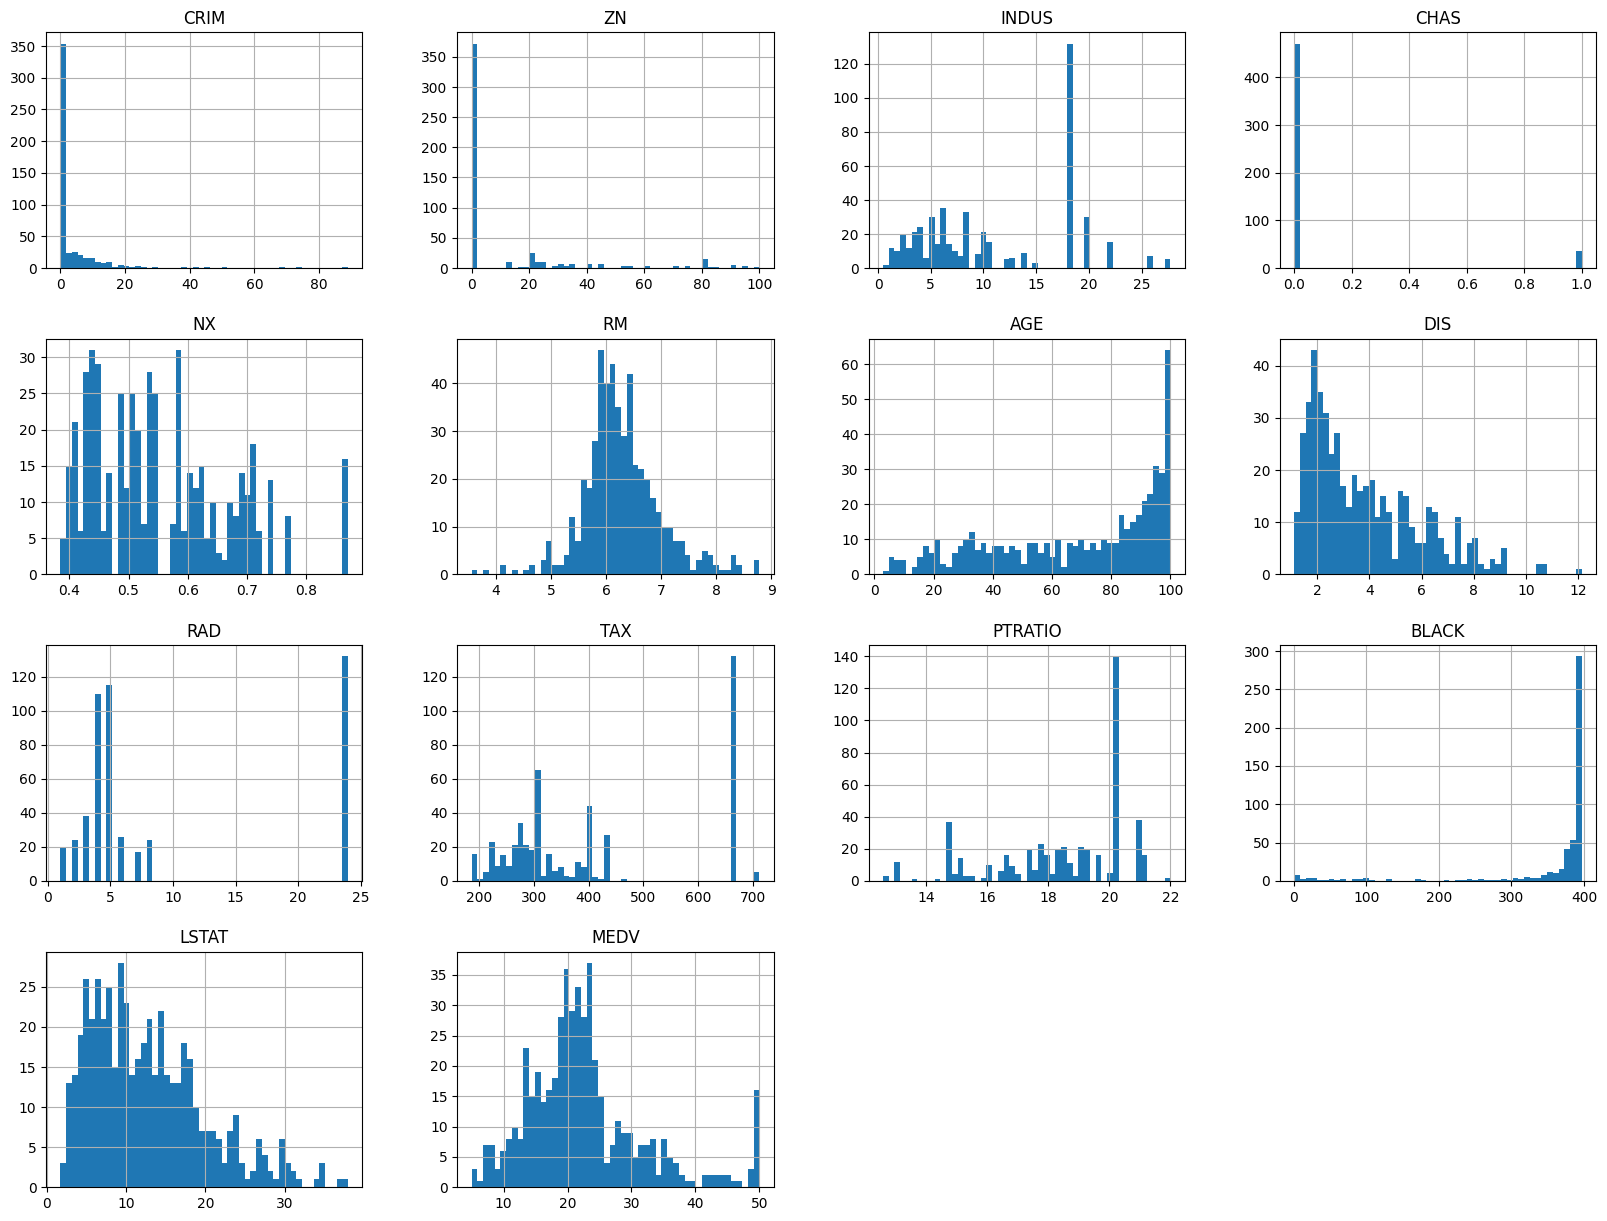

In [4]:
housing.hist(bins=50,figsize=(20,15))

 ## looking for correlations


In [5]:

corr_matrix=housing.corr()
corr_matrix


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
corr_matrix["MEDV"].sort_values(ascending =False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
BLACK      0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NX        -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: xlabel='LSTAT', ylabel='MEDV'>

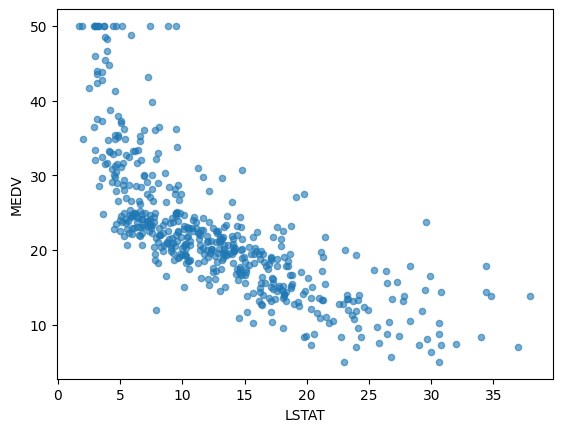

In [7]:
housing.plot(kind="scatter",x="LSTAT",y="MEDV",alpha=0.6)

In [8]:
x=housing.drop("MEDV",axis=1)
y=housing["MEDV"].copy()
x

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [10]:
housing["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

## train_test_split

In [11]:
from sklearn.model_selection import train_test_split
stratify_col = x['CHAS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state=42,stratify=stratify_col)


In [12]:
print(f"x_train valuecounts: {x_train["CHAS"].value_counts()}\nx_test valuecounts:{x_test["CHAS"].value_counts()}")

x_train valuecounts: CHAS
0    376
1     28
Name: count, dtype: int64
x_test valuecounts:CHAS
0    95
1     7
Name: count, dtype: int64


## creating pipline

In [13]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
full_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy ="median")),
    ("std_scaler",StandardScaler())
])

## For multiple imputing for multiple coulmns

In [14]:
from sklearn.compose import ColumnTransformer
num_cols = x.select_dtypes(include=["float64", "int64","int32"]).columns
cat_cols = x.select_dtypes(exclude=["float64","int64","int32"]).columns

# Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("std_scaler",StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Combine
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

#pipeline
full_pipeline =Pipeline([
    ("preprocessing",preprocessor),
    
])

In [15]:
# Fit-transform training data
x_train_prepared = full_pipeline.fit_transform(x_train)

In [16]:
# Quick prediction check on a few samples
some_data = x_train.iloc[:5]
some_labels = y_train.iloc[:5]

In [17]:
some_data_prepared = full_pipeline.transform(some_data)

In [18]:
some_data_prepared

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49865392, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28660512,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13494109, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## using linear regression

In [20]:
# Model 1: Linear Regression
model = LinearRegression()
model.fit(x_train_prepared, y_train)

LinearRegression()

In [21]:
# Quick prediction check on a few samples
print("Quick Check - Linear Regression Predictions vs Actual")
print("Predictions:", model.predict(some_data_prepared))
print("Actual:", list(some_labels))

Quick Check - Linear Regression Predictions vs Actual
Predictions: [23.94996893 27.21690623 20.58079789 25.04088721 23.76177838]
Actual: [21.9, 24.5, 16.7, 23.1, 23.0]


In [22]:
# Predict and evaluate on training data
housing_prediction = model.predict(x_train_prepared)
print("Linear Regression")
print(f"MAE: {metrics.mean_absolute_error(y_train, housing_prediction)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_train, housing_prediction))}")
print(f"R2 Score: {metrics.r2_score(y_train, housing_prediction)}")

Linear Regression
MAE: 3.392569109470017
RMSE: 4.829321492635759
R2 Score: 0.7345817245515911


## using decision tree

In [23]:
# Model 2: Decision Tree
model1 = DecisionTreeRegressor()
model1.fit(x_train_prepared, y_train)
housing_prediction1 = model1.predict(x_train_prepared)
print("Decision Tree")
print(f"MAE: {metrics.mean_absolute_error(y_train, housing_prediction1)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_train, housing_prediction1))}")
print(f"R2 Score: {metrics.r2_score(y_train, housing_prediction1)}")

Decision Tree
MAE: 0.0
RMSE: 0.0
R2 Score: 1.0


## using Random forest 

In [55]:
# Model 3: Random forest
model2 = RandomForestRegressor()
model2.fit(x_train_prepared, y_train)
housing_prediction2 = model2.predict(x_train_prepared)

In [56]:
print("Random Forest")
print(f"MAE: {metrics.mean_absolute_error(y_train, housing_prediction2)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_train, housing_prediction2))}")
print(f"R2 Score: {metrics.r2_score(y_train, housing_prediction2)}")

Random Forest
MAE: 0.8248465346534628
RMSE: 1.2054086012799148
R2 Score: 0.9834641257999472


### as we can see error is 0 in decision tree .so we can say that  model has overfitted the data
### now we will use cross-validation
## cross validation for linear regression

In [57]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, x_train_prepared , y_train, cv=10, scoring="neg_mean_squared_error")

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print("Average RMSE:", rmse_scores.mean())

[4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Average RMSE: 5.030437102767306


## cross validation for descision tree

In [38]:
model1 = DecisionTreeRegressor()
scores = cross_val_score(model1, x_train_prepared , y_train, cv=10, scoring="neg_mean_squared_error")

# Convert negative MSE to positive RMSE
rmse_scores1 = np.sqrt(-scores)
print(rmse_scores1)
print("Average RMSE:", rmse_scores1.mean())

[4.15800726 5.67777009 5.42159188 4.04061695 4.06309611 3.47663631
 6.53343325 3.74202485 3.3400973  4.58020196]
Average RMSE: 4.5033475966129775


## cross validation for random forest

In [39]:
model2 = RandomForestRegressor()
scores = cross_val_score(model2, x_train, y_train, cv=10, scoring="neg_mean_squared_error")

# Convert negative MSE to positive RMSE
rmse_scores2 = np.sqrt(-scores)
print(rmse_scores2)
print("Average RMSE:", rmse_scores2.mean())

[2.90828447 2.70066947 4.6204353  2.65017017 3.49699321 2.55039056
 4.8734243  3.3488853  3.43149065 3.39308454]
Average RMSE: 3.397382797415019


In [40]:
def print_score(score,model):
    print(f"model name:{model}")
    print(f"mean: {score.mean()}")
    print(f"standard deviation: {score.std()}")

In [41]:
print_score(rmse_scores,model)
print_score(rmse_scores1,model1)
print_score(rmse_scores2,model2)

model name:LinearRegression()
mean: 5.030437102767306
standard deviation: 1.0607661158294837
model name:DecisionTreeRegressor()
mean: 4.5033475966129775
standard deviation: 0.9931614019994833
model name:RandomForestRegressor()
mean: 3.397382797415019
standard deviation: 0.7542122507424316


### model -> RANDOM FOREST REGRESSOR  (as it giving less error)

## saving the model

In [59]:
from joblib import dump,load
dump(model2,"dragon.joblib")

['dragon.joblib']

In [60]:
x_test_prepared =full_pipeline.transform(x_test)

In [61]:
final_prediction =model2.predict(x_test_prepared)

In [62]:
final_mse= metrics.mean_squared_error(y_test,final_prediction)
final_rmse =np.sqrt(metrics.mean_squared_error(y_test,final_prediction))

In [63]:
print("Final Evaluation on Test Data")
print(f"MSE: {final_mse}")
print(f"RMSE: {final_rmse}")

Final Evaluation on Test Data
MSE: 8.9859741862745
RMSE: 2.997661452912003


## model usuage

## exmaple 1

In [64]:
some_data_prepared[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [65]:
model = load("dragon.joblib")
input_sample = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
predicted_value = model.predict(input_sample)

In [66]:
print("Predicted Value for Given Input:", predicted_value)

Predicted Value for Given Input: [22.345]


## exmaple 2

In [67]:
raw_input = [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.9, 4.98]]
x = housing.drop("MEDV", axis=1)  # All features (13 columns)
y = housing["MEDV"].copy()        # The label/output to predict

raw_input_df = pd.DataFrame(raw_input, columns=x.columns)
input_prepared = full_pipeline.transform(raw_input_df)

In [68]:
predicted_value = model.predict(input_prepared)

In [69]:
print("Predicted Value for Given Input:", predicted_value)

Predicted Value for Given Input: [25.549]
